In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import operator
import difflib


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

from collections import Counter


In [2]:
import pandas as pd
df=pd.read_csv('C:\\Users\\User\\Downloads\\wfp_food_prices_kaz (1).csv')
df= df.drop(labels=0, axis=0)
df[:5]

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,cereals and tubers,Potatoes,KG,actual,Retail,KZT,40.0,0.2436
2,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,61.0,0.3714
3,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,403.0,2.4539
4,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,milk and dairy,Milk,L,actual,Retail,KZT,58.0,0.3532
5,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,oil and fats,Oil (sunflower),L,actual,Retail,KZT,184.0,1.1204


In [3]:
df.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,3365,3365,3365,3365,3365,3365,3365,3365,3365,3365,3365,3365,3365,3365
unique,181,4,4,4,4,4,4,5,2,1,1,1,679,3005
top,2005-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,cereals and tubers,Potatoes,KG,actual,Retail,KZT,125.0,0.3606
freq,19,905,905,905,905,905,1448,724,2171,3365,3365,3365,47,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3365 entries, 1 to 3365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       3365 non-null   object
 1   admin1     3365 non-null   object
 2   admin2     3365 non-null   object
 3   market     3365 non-null   object
 4   latitude   3365 non-null   object
 5   longitude  3365 non-null   object
 6   category   3365 non-null   object
 7   commodity  3365 non-null   object
 8   unit       3365 non-null   object
 9   priceflag  3365 non-null   object
 10  pricetype  3365 non-null   object
 11  currency   3365 non-null   object
 12  price      3365 non-null   object
 13  usdprice   3365 non-null   object
dtypes: object(14)
memory usage: 368.2+ KB


In [5]:
df.dtypes

date         object
admin1       object
admin2       object
market       object
latitude     object
longitude    object
category     object
commodity    object
unit         object
priceflag    object
pricetype    object
currency     object
price        object
usdprice     object
dtype: object

In [6]:
df.market.value_counts()

Almaty        905
Kostanay      903
Nur-Sultan    834
Aktau         723
Name: market, dtype: int64

In [7]:
from datetime import datetime
df['date']=df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [8]:
df.dtypes

date         datetime64[ns]
admin1               object
admin2               object
market               object
latitude             object
longitude            object
category             object
commodity            object
unit                 object
priceflag            object
pricetype            object
currency             object
price                object
usdprice             object
dtype: object

In [9]:
grouped=df.groupby('market')
alpha_data=grouped.get_group('Nur-Sultan')

In [10]:
alpha_data[:5]

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,cereals and tubers,Potatoes,KG,actual,Retail,KZT,40.0,0.2436
2,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,61.0,0.3714
3,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,403.0,2.4539
4,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,milk and dairy,Milk,L,actual,Retail,KZT,58.0,0.3532
5,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,oil and fats,Oil (sunflower),L,actual,Retail,KZT,184.0,1.1204


In [11]:
beta_data=grouped.get_group('Almaty')
beta_data[:5]

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
6,2005-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,cereals and tubers,Potatoes,KG,actual,Retail,KZT,49.0,0.2984
7,2005-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,53.0,0.3227
8,2005-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,413.0,2.5148
9,2005-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,milk and dairy,Milk,L,actual,Retail,KZT,66.0,0.4019
10,2005-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,oil and fats,Oil (sunflower),L,actual,Retail,KZT,166.0,1.0108


In [12]:
gamma_data=grouped.get_group('Kostanay')
gamma_data[:5]

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
11,2005-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,cereals and tubers,Potatoes,KG,actual,Retail,KZT,34.0,0.207
12,2005-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,39.0,0.2375
13,2005-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,380.0,2.3138
14,2005-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,milk and dairy,Milk,L,actual,Retail,KZT,50.0,0.3045
15,2005-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,oil and fats,Oil (sunflower),L,actual,Retail,KZT,173.0,1.0534


In [13]:
ultra_data=grouped.get_group('Aktau')
ultra_data[:5]

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
16,2005-11-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,cereals and tubers,Potatoes,KG,actual,Retail,KZT,55.0,0.3349
17,2005-11-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,50.0,0.3045
18,2005-11-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,534.0,3.2515
19,2005-11-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,oil and fats,Oil (sunflower),L,actual,Retail,KZT,186.0,1.1326
35,2005-12-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,cereals and tubers,Potatoes,KG,actual,Retail,KZT,55.0,0.3361


In [14]:
df = df.explode('price')
df['price'] = df['price'].astype('float')

<AxesSubplot:xlabel='price', ylabel='commodity'>

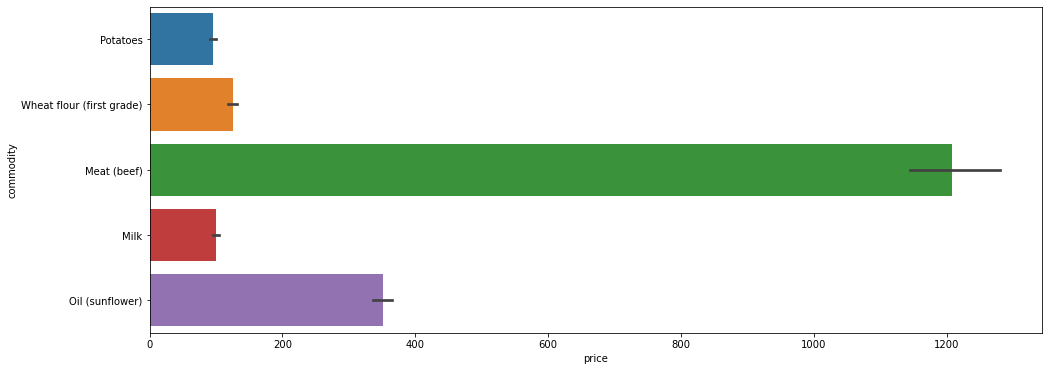

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.barplot(x=df['price'],y='commodity',data=alpha_data)

<AxesSubplot:xlabel='price', ylabel='commodity'>

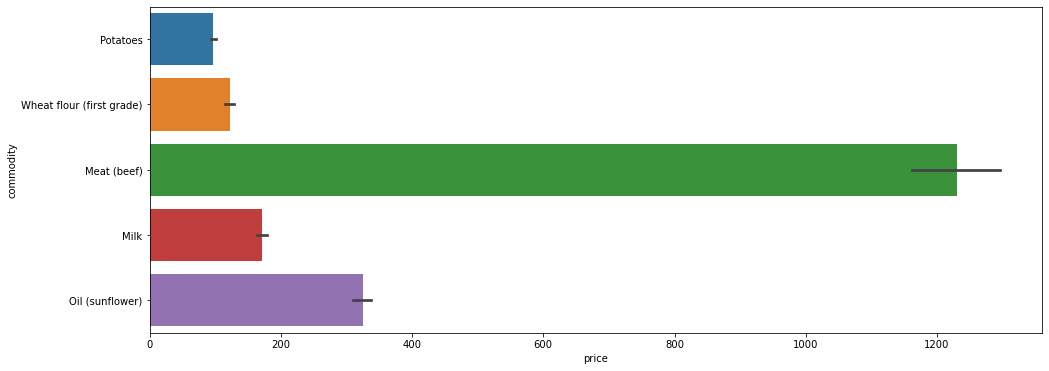

In [16]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df['price'],y='commodity',data=beta_data)


<AxesSubplot:xlabel='price', ylabel='commodity'>

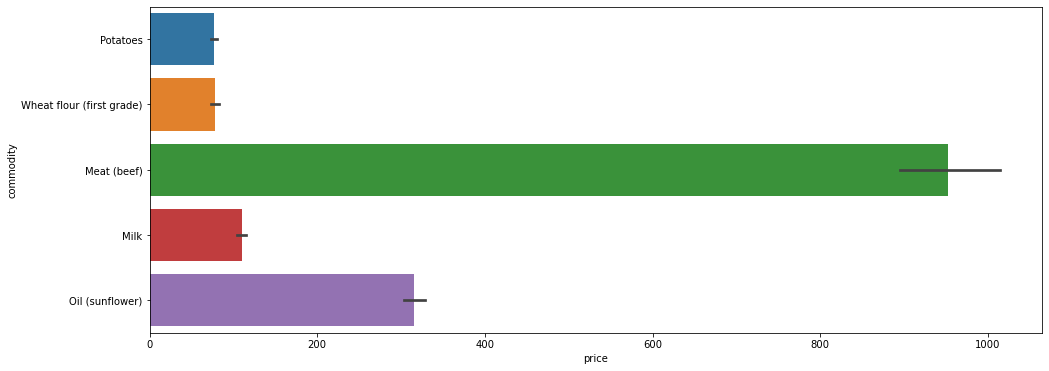

In [17]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df['price'],y='commodity',data=gamma_data)

<AxesSubplot:xlabel='price', ylabel='commodity'>

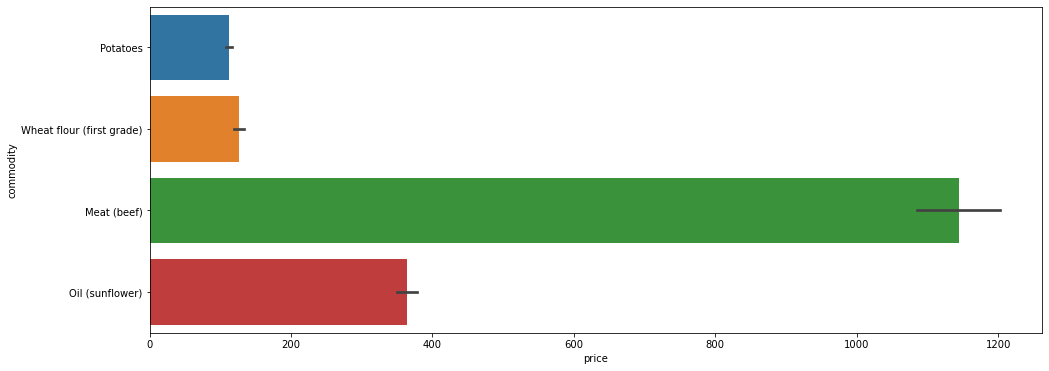

In [18]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df['price'],y='commodity',data=ultra_data)

<AxesSubplot:xlabel='price', ylabel='priceflag'>

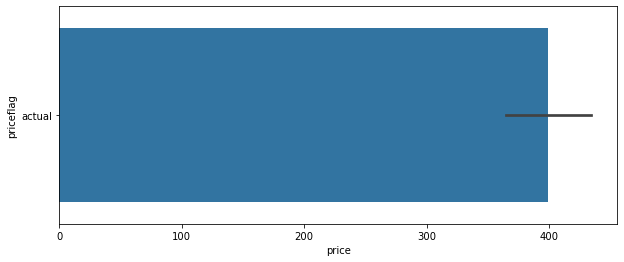

In [19]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df['price'],y='priceflag',data=alpha_data)

<AxesSubplot:xlabel='price', ylabel='unit'>

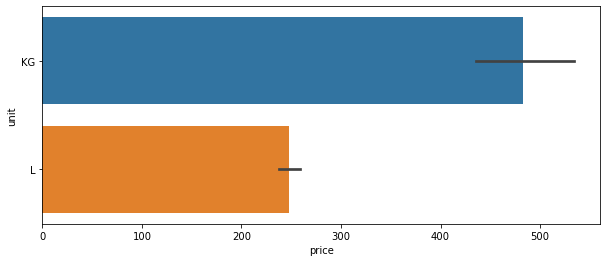

In [20]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df['price'],y='unit',data=beta_data)

<AxesSubplot:xlabel='price', ylabel='unit'>

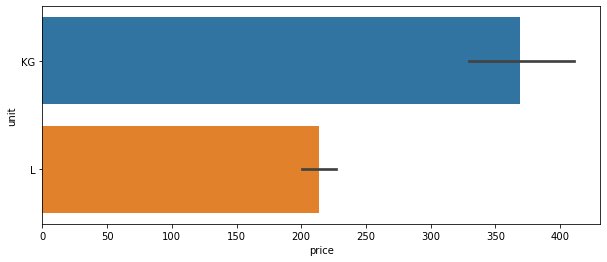

In [21]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df['price'],y='unit',data=gamma_data)

<AxesSubplot:xlabel='price', ylabel='unit'>

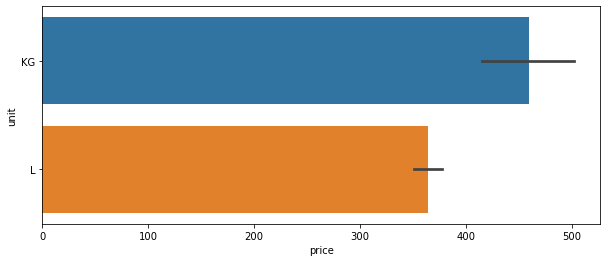

In [22]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df['price'],y='unit',data=ultra_data)

In [23]:
df = df.explode('price')
df['price'] = df['price'].astype('float')

In [24]:
beta_data['price']=pd.to_numeric(beta_data['price'])

In [25]:
beta_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 6 to 3356
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       905 non-null    datetime64[ns]
 1   admin1     905 non-null    object        
 2   admin2     905 non-null    object        
 3   market     905 non-null    object        
 4   latitude   905 non-null    object        
 5   longitude  905 non-null    object        
 6   category   905 non-null    object        
 7   commodity  905 non-null    object        
 8   unit       905 non-null    object        
 9   priceflag  905 non-null    object        
 10  pricetype  905 non-null    object        
 11  currency   905 non-null    object        
 12  price      905 non-null    float64       
 13  usdprice   905 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 138.3+ KB


AxesSubplot(0.125,0.125;0.775x0.755)
                                           price
date                                            
2005-11-30  AxesSubplot(0.125,0.125;0.775x0.755)
2005-12-31  AxesSubplot(0.125,0.125;0.775x0.755)
2006-01-31  AxesSubplot(0.125,0.125;0.775x0.755)
2006-02-28  AxesSubplot(0.125,0.125;0.775x0.755)
2006-03-31  AxesSubplot(0.125,0.125;0.775x0.755)
...                                          ...
2020-07-31  AxesSubplot(0.125,0.125;0.775x0.755)
2020-08-31  AxesSubplot(0.125,0.125;0.775x0.755)
2020-09-30  AxesSubplot(0.125,0.125;0.775x0.755)
2020-10-31  AxesSubplot(0.125,0.125;0.775x0.755)
2020-11-30  AxesSubplot(0.125,0.125;0.775x0.755)

[181 rows x 1 columns]


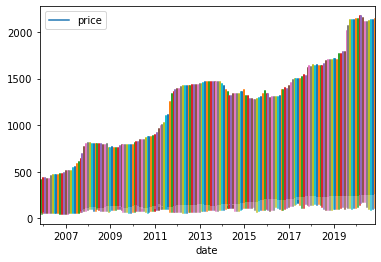

In [26]:
print(beta_data[['price','date']].set_index('date').resample('M').mean().plot())
print(beta_data[['price','date']].set_index('date').resample('M').plot())

                                        price
date                                         
2005-11-30  AxesSubplot(0.125,0.2;0.775x0.68)
2005-12-31  AxesSubplot(0.125,0.2;0.775x0.68)
2006-01-31  AxesSubplot(0.125,0.2;0.775x0.68)
2006-02-28  AxesSubplot(0.125,0.2;0.775x0.68)
2006-03-31  AxesSubplot(0.125,0.2;0.775x0.68)
...                                       ...
2020-07-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-08-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-09-30  AxesSubplot(0.125,0.2;0.775x0.68)
2020-10-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-11-30  AxesSubplot(0.125,0.2;0.775x0.68)

[181 rows x 1 columns]


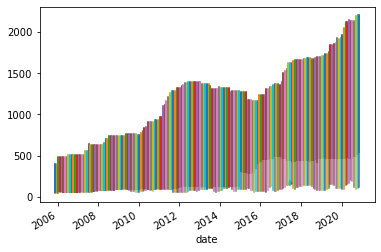

In [27]:
alpha_data['price']=pd.to_numeric(alpha_data['price'])
print(alpha_data[['price','date']].set_index('date').resample('M').plot())

                                        price
date                                         
2005-11-30  AxesSubplot(0.125,0.2;0.775x0.68)
2005-12-31  AxesSubplot(0.125,0.2;0.775x0.68)
2006-01-31  AxesSubplot(0.125,0.2;0.775x0.68)
2006-02-28  AxesSubplot(0.125,0.2;0.775x0.68)
2006-03-31  AxesSubplot(0.125,0.2;0.775x0.68)
...                                       ...
2020-07-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-08-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-09-30  AxesSubplot(0.125,0.2;0.775x0.68)
2020-10-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-11-30  AxesSubplot(0.125,0.2;0.775x0.68)

[181 rows x 1 columns]


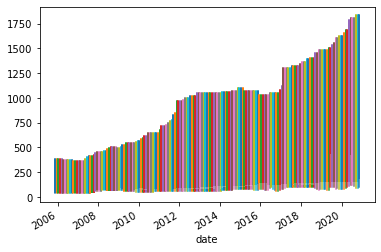

In [28]:
gamma_data['price']=pd.to_numeric(gamma_data['price'])
print(gamma_data[['price','date']].set_index('date').resample('M').plot())

                                        price
date                                         
2005-11-30  AxesSubplot(0.125,0.2;0.775x0.68)
2005-12-31  AxesSubplot(0.125,0.2;0.775x0.68)
2006-01-31  AxesSubplot(0.125,0.2;0.775x0.68)
2006-02-28  AxesSubplot(0.125,0.2;0.775x0.68)
2006-03-31  AxesSubplot(0.125,0.2;0.775x0.68)
...                                       ...
2020-07-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-08-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-09-30  AxesSubplot(0.125,0.2;0.775x0.68)
2020-10-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-11-30  AxesSubplot(0.125,0.2;0.775x0.68)

[181 rows x 1 columns]


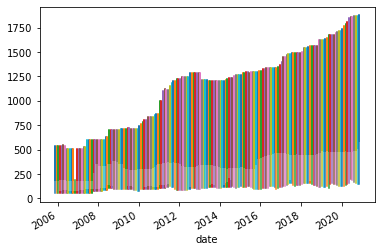

In [29]:
ultra_data['price']=pd.to_numeric(ultra_data['price'])
print(ultra_data[['price','date']].set_index('date').resample('M').plot())

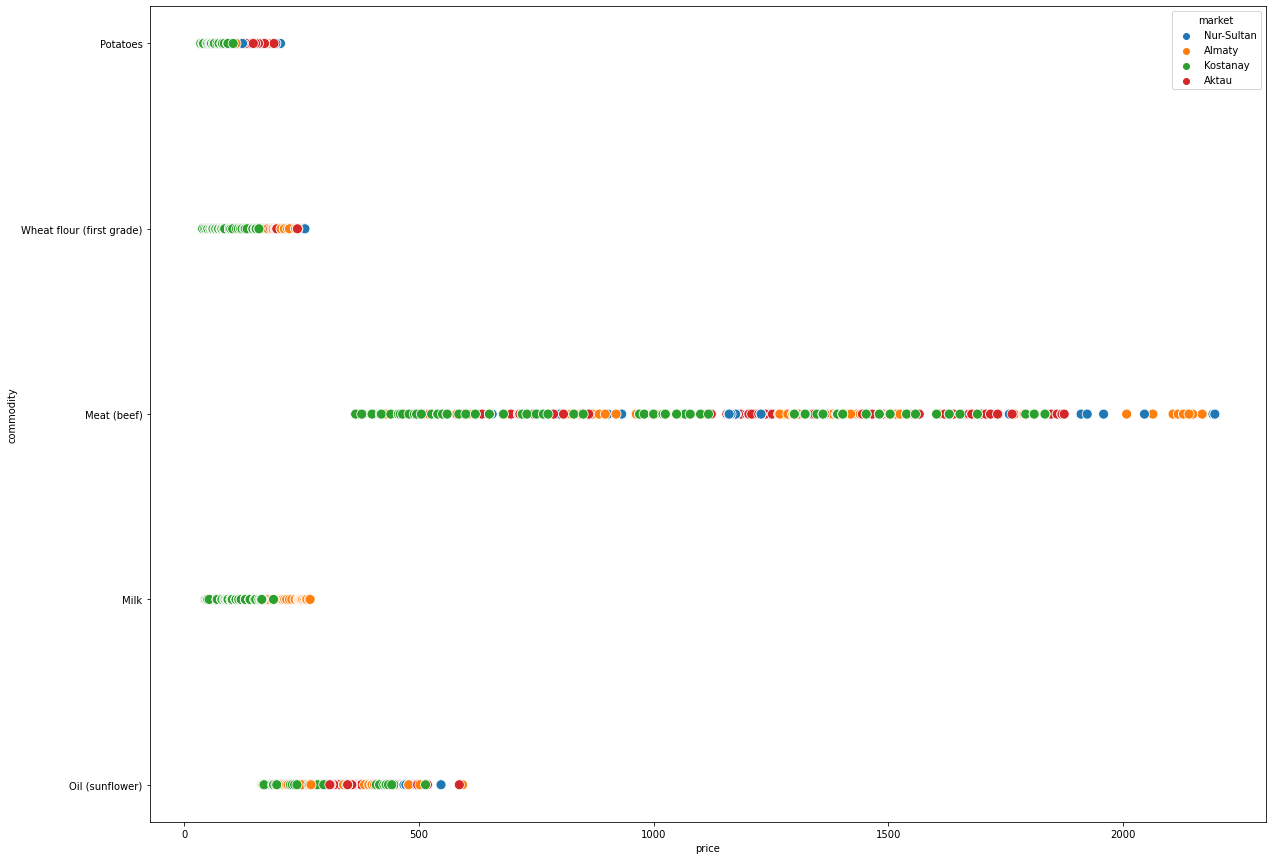

In [30]:
fig,ax = plt.subplots(figsize=(20, 15))
sns.scatterplot(x='price',y='commodity',hue = 'market',ax = ax,s=100, color = '#e14735',data=df)
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

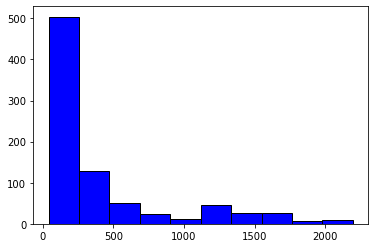

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(alpha_data['price'], color = 'blue', edgecolor = 'black')
plt

In [32]:
print("Astana's total price is",alpha_data.price.sum())
print("Almaty's total price is",beta_data.price.sum())
print("Kostanay's total price is",gamma_data.price.sum())
print("Aktau's total price is",gamma_data.price.sum())

Astana's total price is 332846.0
Almaty's total price is 352036.0
Kostanay's total price is 277291.0
Aktau's total price is 277291.0


In [33]:
data = alpha_data.groupby("commodity")["price"].sum()
data

commodity
Meat (beef)                  218549.0
Milk                          10945.0
Oil (sunflower)               63496.0
Potatoes                      17218.0
Wheat flour (first grade)     22638.0
Name: price, dtype: float64

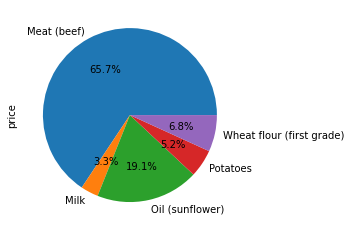

In [34]:
data.plot.pie(autopct="%1.1f%%");

In [35]:
data = beta_data.groupby("commodity")["price"].sum()
data

commodity
Meat (beef)                  222624.0
Milk                          30999.0
Oil (sunflower)               58750.0
Potatoes                      17547.0
Wheat flour (first grade)     22116.0
Name: price, dtype: float64

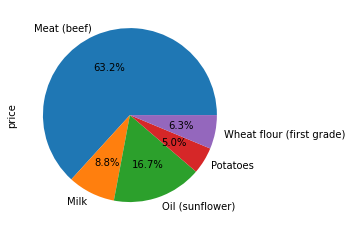

In [36]:
data.plot.pie(autopct="%1.1f%%");

In [37]:
data = gamma_data.groupby("commodity")["price"].sum()
data

commodity
Meat (beef)                  172475.0
Milk                          19647.0
Oil (sunflower)               57195.0
Potatoes                      13921.0
Wheat flour (first grade)     14053.0
Name: price, dtype: float64

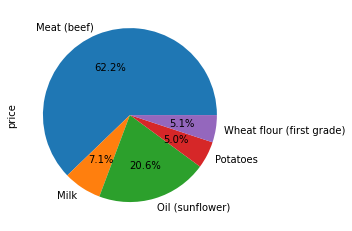

In [38]:
data.plot.pie(autopct="%1.1f%%");

In [39]:
data = ultra_data.groupby("commodity")["price"].sum()
data

commodity
Meat (beef)                  206038.0
Oil (sunflower)               65867.0
Potatoes                      20393.0
Wheat flour (first grade)     22908.0
Name: price, dtype: float64

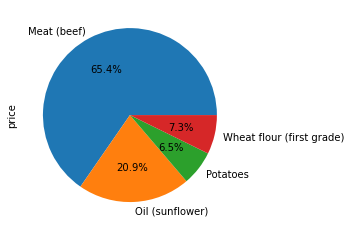

In [40]:
data.plot.pie(autopct="%1.1f%%");

In [44]:
data = pd.read_csv('C:\\Users\\User\\Downloads\\wfp_food_prices_kaz.csv')
print(len(df))
print( data.head() )

3365
         date        admin1       admin2      market  latitude  longitude  \
0  11/15/2005  Akmolinskaya  Tselinograd  Nur-Sultan     51.17      71.43   
1  11/15/2005  Akmolinskaya  Tselinograd  Nur-Sultan     51.17      71.43   
2  11/15/2005  Akmolinskaya  Tselinograd  Nur-Sultan     51.17      71.43   
3  11/15/2005  Akmolinskaya  Tselinograd  Nur-Sultan     51.17      71.43   
4  11/15/2005  Akmolinskaya  Tselinograd  Nur-Sultan     51.17      71.43   

              category                  commodity unit priceflag pricetype  \
0   cereals and tubers                   Potatoes   KG    actual    Retail   
1   cereals and tubers  Wheat flour (first grade)   KG    actual    Retail   
2  meat, fish and eggs                Meat (beef)   KG    actual    Retail   
3       milk and dairy                       Milk    L    actual    Retail   
4         oil and fats            Oil (sunflower)    L    actual    Retail   

  currency  price  usdprice  
0      KZT     40    0.2436  
1  

Text(0.5, 1.08, 'Combination of cloumns')

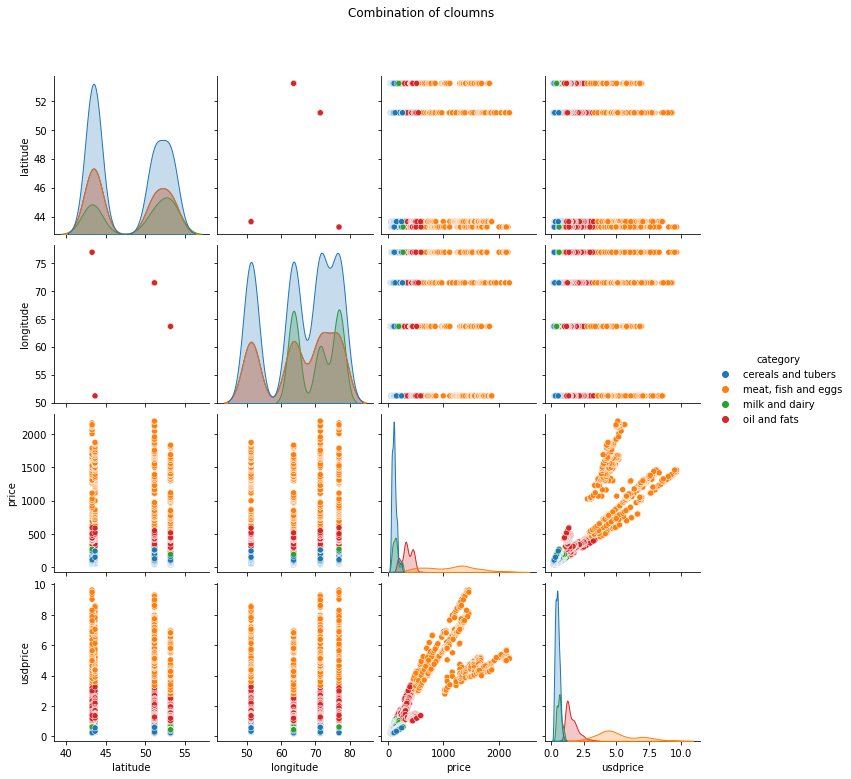

In [46]:
draw = sns.pairplot(data.replace({'category'}), hue= 'category')
draw.fig.suptitle('Combination of cloumns', y=1.08)